In [ ]:
pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()

df = spark.read.csv("/content/netflix_titles.csv", header=True, inferSchema=True)
df.show(5)


+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|       director|                cast|      country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|Kirsten Johnson|                NULL|United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|           NULL|Ama Qamata, Khosi...| South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglands|Julien Leclercq|Sami Bouajila, Tr...|         NULL|Septem

In [ ]:
df = df.dropna()
df = df.dropDuplicates()
df.printSchema()


root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
df.count()


5332

In [ ]:
df.groupBy("type").count().orderBy("count", ascending=False).show(10)

+-------+-----+
|   type|count|
+-------+-----+
|  Movie| 5185|
|TV Show|  147|
+-------+-----+



In [ ]:
df.groupBy("rating").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|              rating|count|
+--------------------+-----+
|               TV-MA| 1812|
|               TV-14| 1213|
|                   R|  775|
|               PG-13|  469|
|               TV-PG|  431|
|                  PG|  274|
|                TV-G|   84|
|                TV-Y|   76|
|               TV-Y7|   76|
|                  NR|   58|
|                   G|   40|
|                  UR|    3|
|            TV-Y7-FV|    3|
|               NC-17|    2|
|    November 1, 2020|    1|
|    Shavidee Trotter|    1|
|       Maury Chaykin|    1|
|                2019|    1|
|                2017|    1|
| Keppy Ekpenyong ...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
df.filter(df["rating"] > 4).show(5)


+-------+-----+--------------------+-----------------+--------------------+-------------------+-------------+----------------+------+--------+---------+--------------------+
|show_id| type|               title|         director|                cast|            country|   date_added|    release_year|rating|duration|listed_in|         description|
+-------+-----+--------------------+-----------------+--------------------+-------------------+-------------+----------------+------+--------+---------+--------------------+
|  s1412|Movie|What Would Sophia...|    Ross Kauffman|"Nancy ""Vincenza...|      Sophia Loren"|United States|January 15, 2021|  2021|   TV-14|   32 min|       Documentaries|
|  s2138|Movie|        An Easy Girl|Rebecca Zlotowski|"Mina Farid, Zahi...| Henri-Noël Tabary"|       France| August 13, 2020|  2019|   TV-MA|   93 min|Comedies, Dramas,...|
|  s1416|Movie| An Imperfect Murder|     James Toback|"Sienna Miller, A...|      James Toback"|United States|January 13, 2021|  20

<Axes: xlabel='rating'>

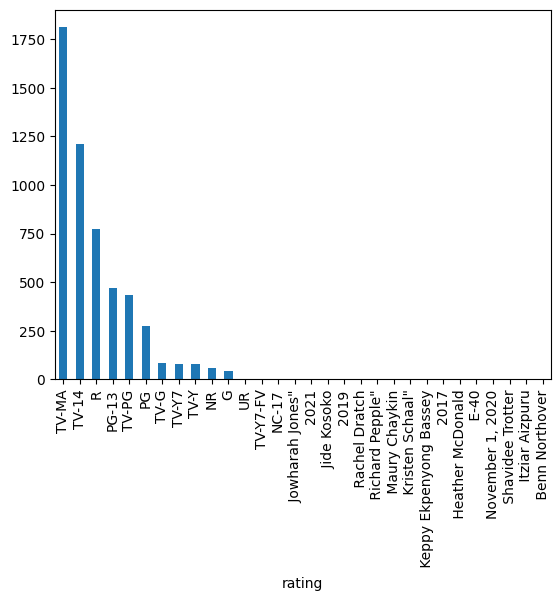

In [ ]:
pdf = df.toPandas()

pdf['rating'].value_counts().plot(kind='bar')
